In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# All Computer Prices

# This is dataset contains all of my computer prices datasets merged into one dataset. With 100k rows of data, I have released a cleaned version of my original dataset. The columns should be self-explanatory, and your mission is to predict the price based on the features.

In [3]:
dataset = pd.read_csv('computer_prices_all.csv')
print(dataset.shape)
dataset.head()

(100000, 33)


,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


In [4]:
desktop_linux = dataset[(dataset['os'] == 'Linux') & (dataset['device_type'] == 'Laptop')]
print(desktop_linux.shape)
desktop_linux.head()

(3613, 33)


,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
26,Laptop,Apple,Apple Air W7N,2022,Linux,2-in-1,Apple,Apple M1 Max,6,26,...,2560x1600,90,60,65,0,Wi-Fi 5,5.0,1.53,12,3546.99
35,Laptop,HP,HP Nitro 4Z1,2018,Linux,Ultrabook,AMD,AMD Ryzen 7 7753,5,16,...,1920x1080,60,80,45,0,Wi-Fi 6E,5.3,2.37,24,2232.99
71,Laptop,HP,HP Zen PCS,2022,Linux,Mainstream,AMD,AMD Ryzen 5 7246,3,8,...,3840x2160,60,50,120,0,Wi-Fi 6E,5.2,2.37,12,1911.99
76,Laptop,MSI,MSI Slim LW9,2023,Linux,Ultrabook,Intel,Intel i5-11704,2,8,...,1920x1080,60,50,120,0,Wi-Fi 5,5.0,2.37,12,1651.99


In [6]:
prices_desktop_linux = desktop_linux['price']

q1 = prices_desktop_linux.quantile(0.25)
q3 = prices_desktop_linux.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

prices_desktop_linux = prices_desktop_linux[(prices_desktop_linux >= lim_inf) & (prices_desktop_linux <= lim_sup)]
print(prices_desktop_linux.shape)
prices_desktop_linux.head()

(3578,)


4      2681.99
35     2232.99
71     1911.99
76     1651.99
124    2190.99
Name: price, dtype: float64

In [7]:
# Medidas de Centralidade

media = np.mean(prices_desktop_linux)
mediana = np.median(prices_desktop_linux)
quartis = np.quantile(prices_desktop_linux, q=[0.25, 0.50, 0.75])
desvio_padrao = np.std(prices_desktop_linux)
variancia = np.var(prices_desktop_linux)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 1887.47
Mediana: 1828.99
Quartis: [1471.99 1828.99 2251.99]
Desvio-Padrão: 544.32
Variância: 296287.59


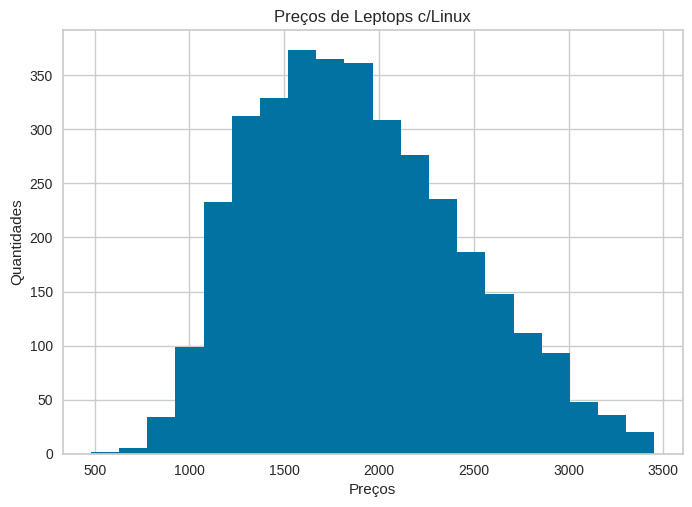

In [11]:
# Teste de Normalidade - Histograma

plt.hist(prices_desktop_linux, bins=20)
plt.title('Preços de Leptops c/Linux')
plt.xlabel('Preços')
plt.ylabel('Quantidades')
plt.show()

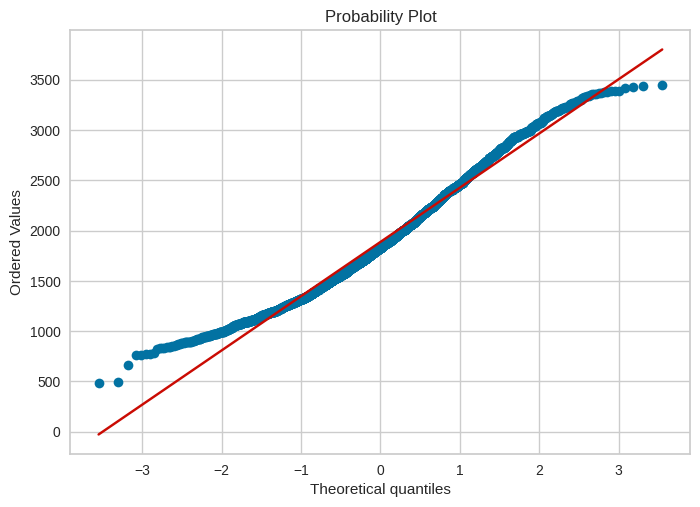

In [9]:
# Teste de Normalidade Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(prices_desktop_linux, fit=True,   plot=ax)
plt.show()

In [10]:
# Teste de Normalidade - Shapiro-Wilk

stats.shapiro(prices_desktop_linux)

ShapiroResult(statistic=np.float64(0.98033230314211), pvalue=np.float64(6.95840007141778e-22))

In [ ]:
# Pela análise do Gráfico de Histograma e do Gráfico Q-Q Plot podemos dizer com muita segurança que a distribuição é distribuída normalmente em torno da média. No teste de Shapiro-Wilk o p ficou muito menor que 0.05, mas não há evidência para descartar a hipótese nula.

In [28]:
# Qual a probabilidade de escolhido ao acaso um Laptop com OS Linux custar mais que 2000 dólares.

prob = stats.norm.sf(2000, media, desvio_padrao)
print(f'A Probabilidade é de: {prob * 100:.2f}%')

A Probabilidade é de: 41.81


In [30]:
# Qual a probabilidade de escolhido ao acaso um Laptop com OS Linux custar menos que 1800 dólares.

prob = stats.norm.cdf(1800, media, desvio_padrao)
print(f'A Probabilidade é de: {prob * 100:.2f}%')

A Probabilidade é de: 43.62%


In [12]:
# Criação de um modelo para prevê o preço de um Laptop com OS Linux com relação ao peso do equipamento.

X = desktop_linux['price'].values
y = desktop_linux['weight_kg'].values
X

array([2681.99, 3546.99, 2232.99, ..., 2527.99, 1542.99, 2029.99],
      shape=(3613,))

In [13]:
correlacao = np.corrcoef(X, y)
print(correlacao)
print(correlacao ** 2)

[[1.         0.01450957]
 [0.01450957 1.        ]]
[[1.00000000e+00 2.10527644e-04]
 [2.10527644e-04 1.00000000e+00]]


In [ ]:
# Pelo que verificou-se existe uma correlação positiva muito fraca entre preço do laptops e seu peso.

In [16]:
# Criação de um modelo para prevê o preço de um Laptop com OS Linux com relação a quantidade de RAM em Gbyts do equipamento.

X = desktop_linux['price'].values
y = desktop_linux['ram_gb'].values
X

array([2681.99, 3546.99, 2232.99, ..., 2527.99, 1542.99, 2029.99],
      shape=(3613,))

In [17]:
correlacao = np.corrcoef(X, y)
print(correlacao)
print(correlacao ** 2)

[[1.         0.80108975]
 [0.80108975 1.        ]]
[[1.         0.64174479]
 [0.64174479 1.        ]]


In [ ]:
# Com relação a Laptop com OS Linux verifica-se uma correlação forte positiva entre o preço do equipamento e a quantidade de memória RAM em GBytes

In [18]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


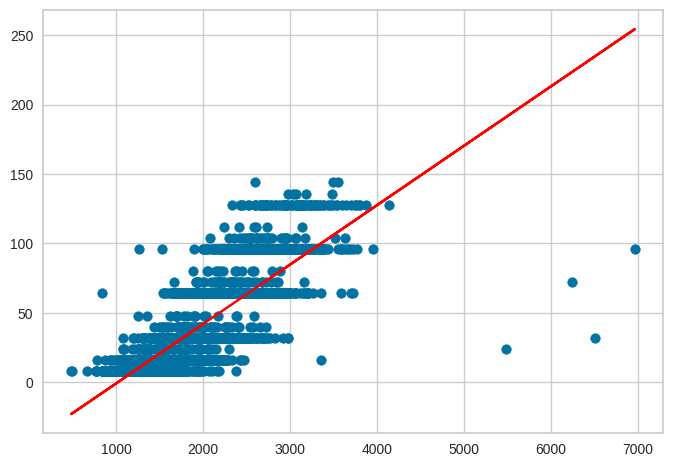

In [19]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [26]:
# Fazendo previsões: Qual a quantidade de memória RAM deve ter um LAPTOP com OS Linux se o preço for igual à US$ 1500.

modelo.predict([[1500]])

array([20.6267751])

In [ ]:
# Segundo o modelo prevê que um computador de 1500 dólares deve ter 20 GB de RAM

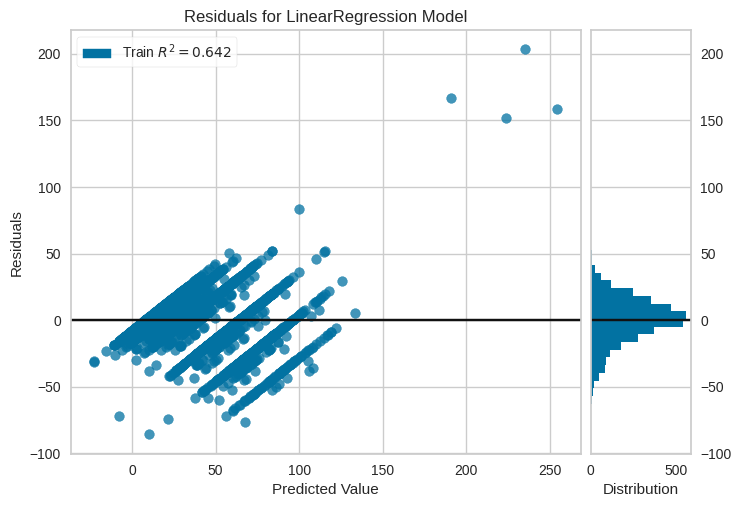

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [27]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

In [ ]:
# O Coeficiente de Determinação R² = 0.642 diz que 64,2% dos Laptops com OS Linux são explicados pela variável exploratória ou seja, a quantidade de memória RAM de um Laptop em 64,2% dos casos são explicados pelo seu preço. Quanto maior o preço maior a quantidade de memória RAM.